# Digit Recognizer - Tensorflow Keras
Notebook based on Kernel from Peter Grenholm

https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99

In [3]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [6]:
train_file = "Documents/Data-Science/kaggle-digit-recognizer/train.csv"
test_file = "Documents/Data-Science/kaggle-digit-recognizer/test.csv"
output_file = "Documents/Data-Science/kaggle-digit-recognizer/submission.csv"

In [7]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')

In [18]:
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

Each data point consists of 784 values. A fully connected net just treats all these values the same, but a CNN treats it as a 28x28 square. Therefore, we reshape the data into 28 x 28 matrices

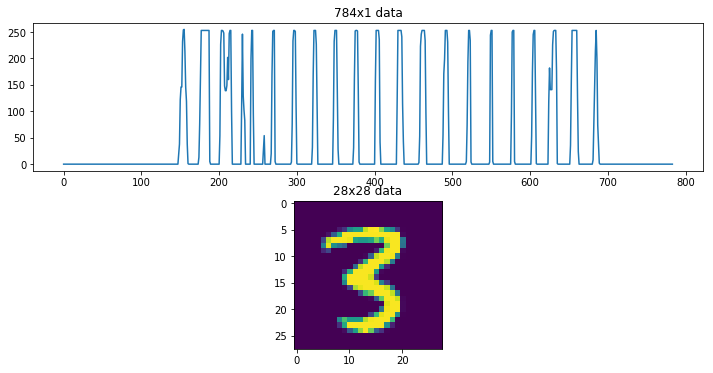

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28))
ax[1].set_title('28x28 data')
plt.show()

In [20]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

It would be possible to train the net on the original data, with pixel values 0 to 255. If we use the standard initialization methods for weights, however, data between 0 and 1 should make the net converge faster.

In [21]:
x_train = x_train.astype("float32")/255
x_val = x_val.astype("float32")/255

The labels were given as integers between 0 and 9. We need to convert these to one-hot encoding, i.e. a 10x1 array with one 1 and nine 0:s, with the position of the 1 showing us the value. See the example, with the position of the 1 showing the correct value for the digit in the graph above.

In [26]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [27]:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Create Model

In [28]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu', 
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
# augmentation step goes here, but I will skip

In [32]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

The model needs to be compiled before training can start. As our loss function, we use logloss which is called ''categorical_crossentropy" in Keras. Metrics is only used for evaluation. As optimizer, we could have used ordinary stochastic gradient descent (SGD), but Adam is faster.

In [30]:
model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(lr=1e-4), 
              metrics=["accuracy"])

We train once with a smaller learning rate to ensure convergence. We then speed things up, only to reduce the learning rate by 10% every epoch. Keras has a function for this:

In [31]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [34]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 65s - loss: 0.8583 - acc: 0.7200 - val_loss: 0.1943 - val_acc: 0.9375
Epoch 2/20
 - 58s - loss: 0.3426 - acc: 0.8888 - val_loss: 0.1388 - val_acc: 0.9575
Epoch 3/20
 - 58s - loss: 0.2760 - acc: 0.9206 - val_loss: 0.0730 - val_acc: 0.9775
Epoch 4/20
 - 58s - loss: 0.2102 - acc: 0.9346 - val_loss: 0.0942 - val_acc: 0.9725
Epoch 5/20
 - 66s - loss: 0.1915 - acc: 0.9421 - val_loss: 0.0662 - val_acc: 0.9700
Epoch 6/20
 - 57s - loss: 0.1680 - acc: 0.9509 - val_loss: 0.0586 - val_acc: 0.9775
Epoch 7/20
 - 62s - loss: 0.1517 - acc: 0.9558 - val_loss: 0.0863 - val_acc: 0.9725
Epoch 8/20
 - 59s - loss: 0.1346 - acc: 0.9622 - val_loss: 0.0555 - val_acc: 0.9775
Epoch 9/20
 - 59s - loss: 0.1246 - acc: 0.9620 - val_loss: 0.0447 - val_acc: 0.9850
Epoch 10/20
 - 61s - loss: 0.1126 - acc: 0.9664 - val_loss: 0.0203 - val_acc: 0.9950
Epoch 11/20
 - 57s - loss: 0.1242 - acc: 0.9665 - val_loss: 0.0505 - val_acc: 0.9800
Epoch 12/20
 - 73s - loss:

## Evaluate

In [35]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0270, final accuracy: 0.9924


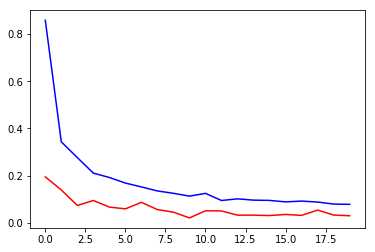

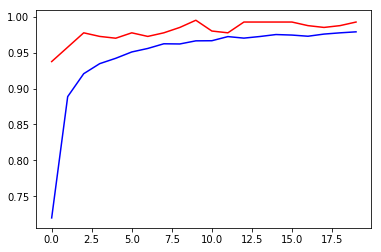

In [37]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [38]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[413   0   0   0   1   0   0   0   1   0]
 [  0 473   0   0   0   0   0   2   0   0]
 [  0   0 420   0   0   0   0   1   1   0]
 [  0   1   1 406   0   0   0   2   2   0]
 [  0   1   0   0 415   0   0   0   0   0]
 [  0   0   0   2   0 367   1   0   0   0]
 [  1   0   0   0   0   0 431   0   1   0]
 [  0   1   4   0   0   0   0 429   0   0]
 [  1   0   0   0   0   1   1   0 404   1]
 [  0   0   1   0   1   1   0   1   1 410]]


In [63]:
n = 1
mc_idx = np.nonzero((y_pred!=n) & (y_true==n))[0]

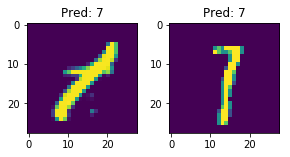

In [64]:
# Show image of training example as well as 
# the predicted and actual values for the training example
sqrt_misses = np.floor(np.sqrt(len(mc_idx)))
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
for i in list(range(0,len(mc_idx))):
    plt.subplot(4, 5, i+1)
    training_example = mc_idx[i]
    plt.imshow(np.transpose(np.hstack(x_val[training_example])))
    plt.title('Pred: ' + str(y_pred[training_example]))
    
plt.tight_layout()
    #print(
    #print('Actual: ' + str(y[training_example]))

In [68]:
n = 4
tp_idx = np.nonzero((y_pred==n) & (y_true==n))[0]

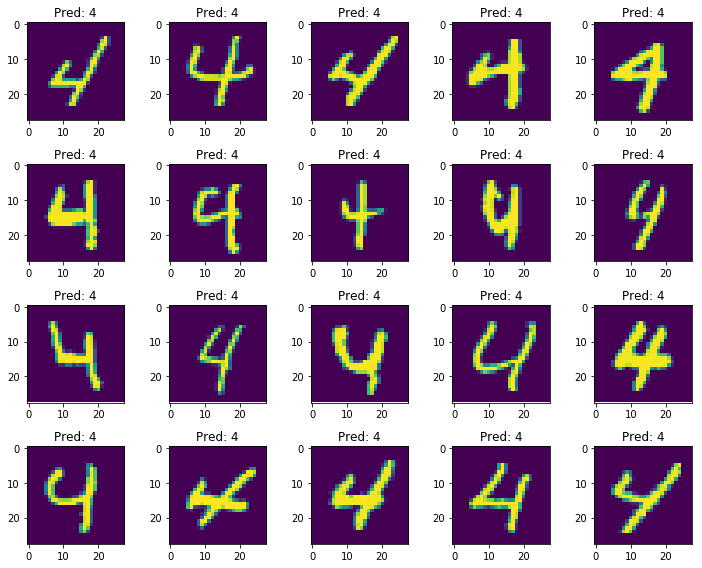

In [69]:
# Show image of training example as well as 
# the predicted and actual values for the training example
sqrt_misses = np.floor(np.sqrt(len(mc_idx)))
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
for i in list(range(0,min(len(tp_idx),20))):
    plt.subplot(4, 5, i+1)
    training_example = tp_idx[i]
    plt.imshow(np.transpose(np.hstack(x_val[training_example])))
    plt.title('Pred: ' + str(y_pred[training_example]))
    
plt.tight_layout()
    #print(
    #print('Actual: ' + str(y[training_example]))

### Takeaways
- The CNN performs so much better!
- I also learned a lot about more advanced ML concepts such as dropout, image shifting and generation, and learning rate scheduling.
- Dropout is the dropping out/ignoring of nodes in the neural network. This forces the neural network to learn more robust features. It can't rely / weight a single node very high or else it will not be able to accurately forecast when that node is "dropped out" while training.
- Image shifting is translating the image in the horizontal and vertical direction so the classifier can learn to idenitfy features which may occur outside of the usual range. This also helps prevent overfitting.
- Learning rate scheduling is the dynamic scheduling of the learning rate. By exponentially decreasing the learning rate, the number of epochs required for the model to converge is decreased.
- I also should learn about augmentation, but I skipped it for now. Will add it later!

Overall, I learned how much I didn't know about Machine Learning techniques, and learned a bit about some of the new techniques.